In [234]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [175]:

URL = "https://forecast.weather.gov/MapClick.php?lat=34.1994&lon=-118.291&FcstType=digitalDWML"


def requestData():
    r = requests.get(URL)
    with open('output.xml', 'wb') as f:
        f.write(r.content)
    print(r.content)

def readLocalData():
    with open('output.xml', 'r') as f:
        data = f.read()
    Bs_data = BeautifulSoup(data, "xml")
    return Bs_data

def getContentsFromSet(set) -> list:
    return [tag.get_text() for tag in set]

def getValuesByTag(bsData, tagName, type):
    result_set = bsData.find(tagName, type=type).find_all('value')
    return getContentsFromSet(result_set)

def processData(bsData):
    start_times_list = getContentsFromSet(bsData.find_all('start-valid-time'))
    hourly_temp = getValuesByTag(bsData, 'temperature', 'hourly')
    hourly_qpf = getValuesByTag(bsData, 'hourly-qpf', 'floating')
    
    df = pd.DataFrame()
    df['start_times'] = start_times_list
    df['hourly_temp'] = hourly_temp
    df['hourly_qpf'] = hourly_qpf
    df['start_times'] = pd.to_datetime(df['start_times'])
    df = df.sort_values(by='start_times')
    return df    


def getStartDateTime():
    startHour = 6
    timezone = "America/Los_Angeles"
    current_date = pd.Timestamp.utcnow().tz_convert("UTC").tz_convert(timezone).replace(
    hour=startHour, minute=0, second=0, microsecond=0)
    return current_date

def getEndDateTime():
    return getStartDateTime() + pd.Timedelta(hours=18)

def getPlotDF(df, st, et):
    start_index = df[df['start_times'] == st].index[0]
    end_index = df[df['start_times'] == et].index[0]
    df = df[start_index:end_index].reset_index()
    df['hourly_temp'] = [float(t) for t in df['hourly_temp'] if t != '']
    df['hourly_qpf'] = [float(t) for t in df['hourly_qpf'] if t != '']
    return df

In [176]:
bsData = readLocalData()
df = processData(bsData=bsData)
st = getStartDateTime()
et = getEndDateTime()
plotDf = getPlotDF(df, st, et)

/tmp/ipykernel_299952/2445733899.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(plotDf['start_times'].dt.strftime('%H:%M'), rotation=45)


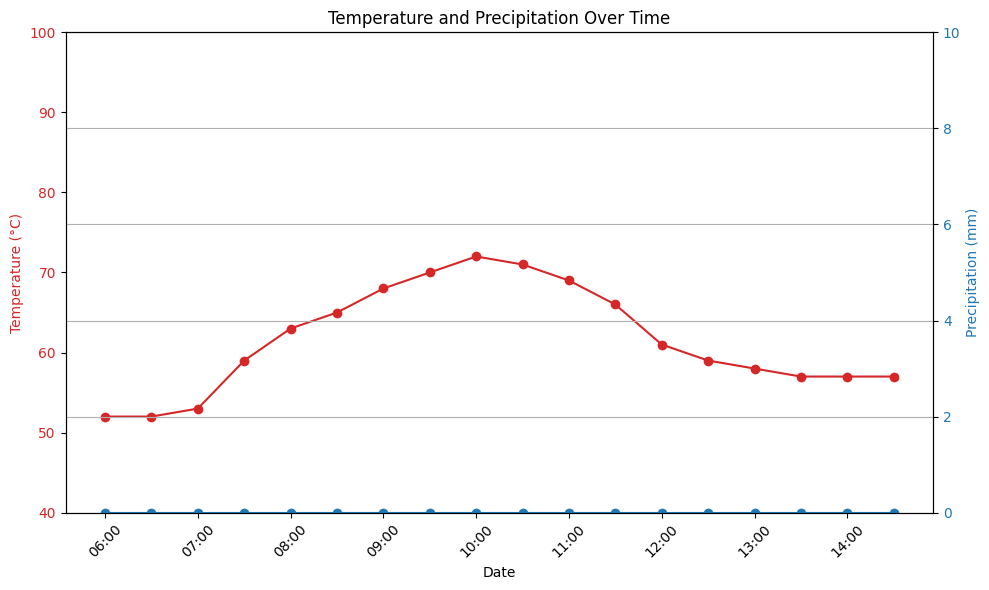

In [221]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Temperature on the first y-axis (left)
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.plot(plotDf['start_times'], plotDf['hourly_temp'], color='tab:red', label='Temperature', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xticklabels(plotDf['start_times'].dt.strftime('%H:%M'), rotation=45)
ax1.set_ylim(40.0, 100.0)
# Create a second y-axis to plot Precipitation (right)
ax2 = ax1.twinx()
ax2.set_ylabel('Precipitation (mm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.plot(plotDf['start_times'], plotDf['hourly_qpf'], color='tab:blue', label='Precipitation (mm)', marker='o')
ax2.set_ylim(0, 10)
# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.grid()
plt.xlim(plotDf['start_times'].iloc[0], plotDf['start_times'].iloc[-1])
# Title and show plot
plt.title('Temperature and Precipitation Over Time')
fig.tight_layout()
plt.show()

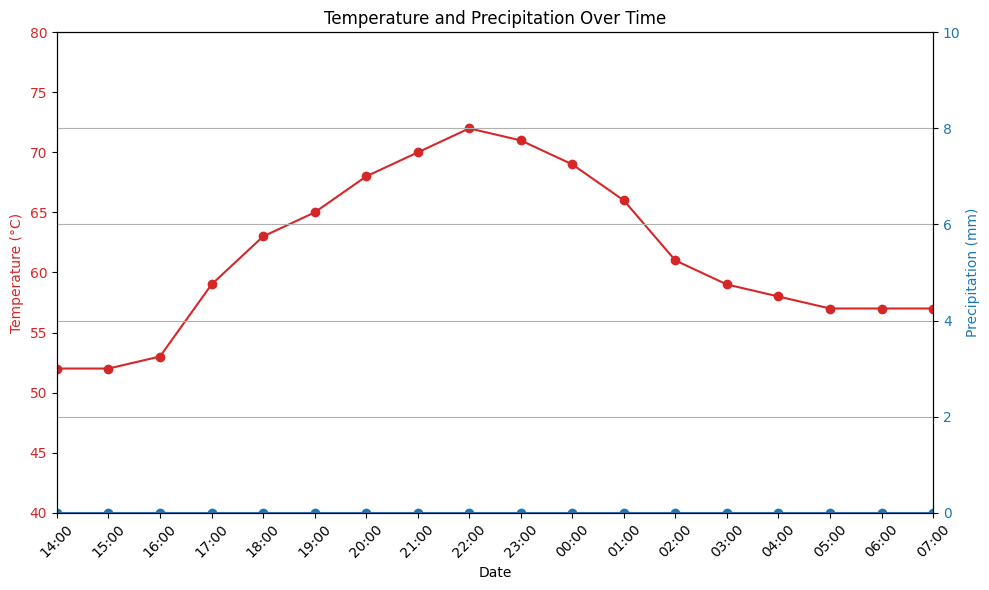

In [237]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Temperature on the first y-axis (left)
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.plot(plotDf['start_times'], plotDf['hourly_temp'], color='tab:red', label='Temperature', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_ylim(40,80)
# Create a second y-axis to plot Precipitation (right)
ax2 = ax1.twinx()
ax2.set_ylabel('Precipitation (mm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.plot(plotDf['start_times'], plotDf['hourly_qpf'], color='tab:blue', label='Precipitation (mm)', marker='o')
ax2.set_ylim(0, 10)

# Set the x-axis to show every hour (remove half-hour ticks)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Every hour
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format
ax1.tick_params(axis='x', rotation=45)

# Make sure the x-axis is aligned with the data's range
ax1.set_xlim(plotDf['start_times'].iloc[0], plotDf['start_times'].iloc[-1])

# Title and show plot
plt.title('Temperature and Precipitation Over Time')
fig.tight_layout()
plt.grid()
plt.show()


In [177]:
plotDf

,index,start_times,hourly_temp,hourly_qpf
0,7,2025-02-02 06:00:00-08:00,52.0,0.0
1,8,2025-02-02 07:00:00-08:00,52.0,0.0
2,9,2025-02-02 08:00:00-08:00,53.0,0.0
3,10,2025-02-02 09:00:00-08:00,59.0,0.0
4,11,2025-02-02 10:00:00-08:00,63.0,0.0
5,12,2025-02-02 11:00:00-08:00,65.0,0.0
6,13,2025-02-02 12:00:00-08:00,68.0,0.0
7,14,2025-02-02 13:00:00-08:00,70.0,0.0
8,15,2025-02-02 14:00:00-08:00,72.0,0.0
9,16,2025-02-02 15:00:00-08:00,71.0,0.0


In [188]:
plotDf['hourly_temp'].max

<bound method Series.max of 0     52.0
1     52.0
2     53.0
3     59.0
4     63.0
5     65.0
6     68.0
7     70.0
8     72.0
9     71.0
10    69.0
11    66.0
12    61.0
13    59.0
14    58.0
15    57.0
16    57.0
17    57.0
Name: hourly_temp, dtype: float64>

In [195]:
max_temp = plotDf.max()

In [201]:
max_temp.start_times

Timestamp('2025-02-02 23:00:00-0800', tz='UTC-08:00')

In [216]:
max_temp.start_times.tz_convert('US/Pacific')

Timestamp('2025-02-02 23:00:00-0800', tz='US/Pacific')

In [220]:
max_temp

index                                 24
start_times    2025-02-02 23:00:00-08:00
hourly_temp                         72.0
hourly_qpf                           0.0
dtype: object

In [219]:
plotDf

,index,start_times,hourly_temp,hourly_qpf
0,7,2025-02-02 06:00:00-08:00,52.0,0.0
1,8,2025-02-02 07:00:00-08:00,52.0,0.0
2,9,2025-02-02 08:00:00-08:00,53.0,0.0
3,10,2025-02-02 09:00:00-08:00,59.0,0.0
4,11,2025-02-02 10:00:00-08:00,63.0,0.0
5,12,2025-02-02 11:00:00-08:00,65.0,0.0
6,13,2025-02-02 12:00:00-08:00,68.0,0.0
7,14,2025-02-02 13:00:00-08:00,70.0,0.0
8,15,2025-02-02 14:00:00-08:00,72.0,0.0
9,16,2025-02-02 15:00:00-08:00,71.0,0.0


In [243]:
max_temp = plotDf.iloc[plotDf['hourly_temp'].idxmax()]

In [247]:
max_temp.start_times.strftime("%H")

'14'

In [245]:
plotDf['hourly_qpf'].sum()

np.float64(0.0)

In [ ]:
max_temp.hourly_temp

In [248]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Set up your ProtonMail Bridge credentials
smtp_server = '127.0.0.1'  # This is the local address for ProtonMail Bridge
smtp_port = 1025  # Default SMTP port for ProtonMail Bridge
username = '91501.weather.report@protonmail.com'  # Your ProtonMail address
password = 'Sitcom_Dart2_Sheet'  # The password provided by ProtonMail Bridge

# Compose the email
msg = MIMEMultipart()
msg['From'] = username
msg['To'] = 'nsgodshall@example.com'
msg['Subject'] = 'Test Email from ProtonMail'

# Body of the email
body = 'This is a test email sent from a ProtonMail account using Python.'
msg.attach(MIMEText(body, 'plain'))

# Send the email using smtplib
try:
    with smtplib.SMTP(smtp_server, smtp_port) as server:
        server.starttls()  # Secure connection
        server.login(username, password)
        text = msg.as_string()
        server.sendmail(username, 'nsgodshall@gmail.com', text)
        print("Email sent successfully!")

except Exception as e:
    print(f"Error sending email: {e}")


Error sending email: [Errno 111] Connection refused


In [253]:
import smtplib
from email.mime.text import MIMEText

subject = "Email Subject"
body = "This is the body of the text message"
sender = "burbank.weather.report@gmail.com"
recipients = ["nsgodshall@gmail.com"]
password = "yopr gqkv ayxd kirb "


def send_email(subject, body, sender, recipients, password):
    msg = MIMEText(body)
    msg['Subject'] = subject
    msg['From'] = sender
    msg['To'] = ', '.join(recipients)
    with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp_server:
       smtp_server.login(sender, password)
       smtp_server.sendmail(sender, recipients, msg.as_string())
    print("Message sent!")


send_email(subject, body, sender, recipients, password)

Message sent!
